![](http://www.dataivy.cn/book/images/head.png)
<table align="center" bgcolor="#FFFFFF" border="0px">
   <tr bgcolor="#FFFFFF">
      <td><img src="http://www.dataivy.cn/book/images/release_date.svg"></td>
      <td><img src="http://www.dataivy.cn/book/images/python-3.7-green.svg"></td>
      <td><a href="http://www.dataivy.cn/blog/python_book_faq/"><img src="http://www.dataivy.cn/book/images/faq-visit_site-blue.svg"></a></td>
      <td><a href="http://www.dataivy.cn/blog/python_book_knows_issues/"><img src="http://www.dataivy.cn/book/images/known_issues.svg"></a></td>
   </tr>
</table>


<hr />

<div align="center"><h1> 第二章&nbsp;&nbsp;数据化运营的数据来源</h1></div>

# 一、说明

- 描述：使用Python获取运营数据和内容延伸源代码
- 时间：2019-01-01
- 作者：宋天龙（Tony Song）
- 程序开发环境：win7 64位
- Python版本：64位 3.7
- 依赖库：具体查看各模块
- 程序输入：具体查看各模块
- 程序输出：具体查看各模块

# 二、程序

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

## 2.2.1 从文本文件读取运营数据

### 1. 使用read、readline、readlines读取数据

In [2]:
file_name = 'text.txt'

file_object = open(file_name)
read_data = file_object.read()
print(read_data)

line1: This is line1
line2: This is line2


In [3]:
file_object = open(file_name)
readline_data = file_object.readline()
print(readline_data)

line1: This is line1



In [4]:
file_object = open(file_name)
readlines_data = file_object.readlines()
print(readlines_data)

['line1: This is line1\n', 'line2: This is line2']


In [5]:
fn = open('text.txt')  # 获得文件对象
print(fn.tell())  # 输出指针位置
line1 = fn.readline()  # 获得文件第一行数据
print(line1)  # 输出第一行数据
print(fn.tell())  # 输出指针位置
line2 = fn.readline()  # 获得文件第二行数据
print(line2)  # 输出第二行数据
print(fn.tell())  # 输出指针位置
fn.close()  # 关闭文件对象

0
line1: This is line1

22
line2: This is line2
42


### 2. 使用Numpy的loadtxt、load、fromfile读取数据

In [6]:
import numpy as np  # 导入numpy库

file_name = 'numpy_data.txt'  # 定义数据文件
data = np.loadtxt(file_name, dtype='float32', delimiter=' ')  # 获取数据
print(data)  # 打印数据

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]]


In [7]:
import numpy as np  # 导入numpy库

write_data = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])  # 定义要存储的数据
np.save('load_data', write_data)  # 保存为npy数据文件
read_data = np.load('load_data.npy')  # 读取npy文件
print(read_data)  # 输出读取的数据

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [8]:
import numpy as np  # 导入numpy库

file_name = 'numpy_data.txt'  # 定义数据文件
data = np.loadtxt(file_name, dtype='float32', delimiter=' ')  # 获取数据
tofile_name = 'binary'  # 定义导出二进制文件名
data.tofile(tofile_name)  # 导出二进制文件
fromfile_data = np.fromfile(tofile_name, dtype='float32')  # 读取二进制文件
print(fromfile_data)  # 打印数据

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


### 3. 使用Pandas的read_csv、read_fwf、read_table读取数据

In [9]:
import pandas as pd  # 导入Pandas库

csv_data = pd.read_csv('csv_data.csv', names=['col1', 'col2', 'col3', 'col4', 'col5'])  # 读取csv数据
print(csv_data)  # 打印输出数据

   col1  col2  col3  col4  col5
0     0     1     2     3     4
1     5     6     7     8     9
2    10    11    12    13    14


In [10]:
import pandas as pd  # 导入Pandas库

fwf_data = pd.read_fwf('fwf_data', widths=[5, 5, 5, 5], names=['col1', 'col2', 'col3', 'col4'])  # 读取csv数据
print(fwf_data)  # 打印输出数据

    col1   col2   col3   col4
0  a2331  a9013  a3211  a9981
1  b4432  b3199  b9766  b2212
2  c3294  c1099  c7631  c4302


In [11]:
import pandas as pd  # 导入Pandas库

table_data = pd.read_table('table_data.txt', sep=';', names=['col1', 'col2', 'col3', 'col4', 'col5'])  # 读取csv数据
print(table_data)  # 打印输出数据

   col1  col2  col3  col4  col5
0     0     1     2     3     4
1     5     6     7     8     9
2    10    11    12    13    14


## 2.2.2 从Excel获取运营数据

In [12]:
# 导入库
import xlrd

In [13]:
# 打开文件
xlsx = xlrd.open_workbook('demo.xlsx')
# 查看所有sheet列表
print('All sheets: %s' % xlsx.sheet_names())

All sheets: ['Sheet1']


In [14]:
# 查看sheet1的数据概况
sheet1 = xlsx.sheets()[0]  # 获得第一张sheet，索引从0开始
sheet1_name = sheet1.name  # 获得名称
sheet1_cols = sheet1.ncols  # 获得列数
sheet1_nrows = sheet1.nrows  # 获得行数
print('Sheet1 Name: %s\nSheet1 cols: %s\nSheet1 rows: %s' % (sheet1_name, sheet1_cols, sheet1_nrows))

Sheet1 Name: Sheet1
Sheet1 cols: 4
Sheet1 rows: 10


In [15]:
# 查看sheet1的特定切片数据
sheet1_nrows4 = sheet1.row_values(4)  # 获得第4行数据
sheet1_cols2 = sheet1.col_values(2)  # 获得第2列数据
cell23 = sheet1.row(2)[3].value  # 查看第3行第4列数据
print('Row 4: %s\nCol 2: %s\nCell 1: %s\n' % (sheet1_nrows4, sheet1_cols2, cell23))

Row 4: ['431381197408191515', '有效', 43469.0, '深圳市']
Col 2: ['Create_Time', 43466.0, 43467.0, 43468.0, 43469.0, 43470.0, 43471.0, 43472.0, 43473.0, 43474.0]
Cell 1: 深圳市



In [16]:
# 查看sheet1的数据明细
for i in range(sheet1_nrows):  # 逐行打印sheet1数据
    print(sheet1.row_values(i))

['ID_number', 'Status', 'Create_Time', 'Business_City']
['431381198109106573', '有效', 43466.0, '深圳市']
['431381198809122734', '有效', 43467.0, '深圳市']
['431381197903117478', '有效', 43468.0, '深圳市']
['431381197408191515', '有效', 43469.0, '深圳市']
['431381197606166011', '有效', 43470.0, '深圳市']
['43138119850623339X', '有效', 43471.0, '深圳市']
['431381198908223477', '有效', 43472.0, '深圳市']
['431381198901176911', '有效', 43473.0, '深圳市']
['43138119870827275X', '有效', 43474.0, '深圳市']


## 2.2.3 从关系型数据库MySQL读取运营数据

In [17]:
import pymysql  # 导入库

config = {'host': '127.0.0.1',  # 默认127.0.0.1
          'user': 'root',  # 用户名
          'password': '123456',  # 密码
          'port': 3306,  # 端口，默认为3306
          'database': 'python_data',  # 数据库名称
          'charset': 'utf8'  # 字符编码
          }
cnn = pymysql.connect(**config)  # 建立mysql连接
cursor = cnn.cursor()  # 获得游标
sql = "SELECT * FROM `order`"  # SQL语句
cursor.execute(sql)  # 执行sql语句
data = cursor.fetchall()  # 通过fetchall方法获得数据
for i in data[:2]:  # 打印输出前2条数据
    print(i)
cursor.close()  # 关闭游标
cnn.close()  # 关闭连接

('3897894579', '0000-00-00', datetime.timedelta(0), 'PENDING_ORDER_CONFIRM', '1038166', 59.0)
('3897983041', '0000-00-00', datetime.timedelta(0), 'REMOVED', '1041656', 19.9)


## 2.2.4 从非关系型数据库MongoDB读取运营数据

In [18]:
from pymongo import MongoClient  # 导入库

client = MongoClient('10.0.0.54', 27017)  #  输出实际的服务器IP地址以及端口，建立连接，并初始化环境变量
db = client.python_data  # 选择test_py库
orders = db.ordersets  # 选择orders集合
terms = [{"user": "tony", "id": "31020", "age": "30", "products": ["215120", "245101", "128410"],
          "date": "2017-04-06"},
         {"user": "lucy", "id": "32210", "age": "29", "products": ["541001", "340740", "450111"],
          "date": "2017-04-06"}]  # 定义一条数据集合用于插入
orders.insert_many(terms)  # 插入数据
print(orders.find_one())  # 获取一文档数据
for i in orders.find():  # 获取所有文档数据并展示
    print(i)

{'_id': ObjectId('5c04e1e88b0b3f1cd05fd80c'), 'user': 'tony', 'id': '31020', 'age': '30', 'products': ['215120', '245101', '128410'], 'date': '2017-04-06'}
{'_id': ObjectId('5c04e1e88b0b3f1cd05fd80c'), 'user': 'tony', 'id': '31020', 'age': '30', 'products': ['215120', '245101', '128410'], 'date': '2017-04-06'}
{'_id': ObjectId('5c04e1e88b0b3f1cd05fd80d'), 'user': 'lucy', 'id': '32210', 'age': '29', 'products': ['541001', '340740', '450111'], 'date': '2017-04-06'}
{'_id': ObjectId('5c0630cf8b0b3f2e24021c27'), 'user': 'tony', 'id': '31020', 'age': '30', 'products': ['215120', '245101', '128410'], 'date': '2017-04-06'}
{'_id': ObjectId('5c0630cf8b0b3f2e24021c28'), 'user': 'lucy', 'id': '32210', 'age': '29', 'products': ['541001', '340740', '450111'], 'date': '2017-04-06'}
{'_id': ObjectId('5c0631038b0b3f2e446815b8'), 'user': 'tony', 'id': '31020', 'age': '30', 'products': ['215120', '245101', '128410'], 'date': '2017-04-06'}
{'_id': ObjectId('5c0631038b0b3f2e446815b9'), 'user': 'lucy', 'i

## 2.2.5 从API获取运营数据

### 1. 获取并解析json数据

In [19]:
import requests  # 导入库

add = '北京市中关村软件园'  # 定义地址
ak = 'DdOyOKo0VZBgdDFQnyhINKYDGkzBkuQr'  # 创建访问应用时获得的AK
url = 'http://api.map.baidu.com/geocoder/v2/?address=%s&output=json&ak=%s'  # 请求URL
res = requests.get(url % (add, ak))  # 获得返回请求
add_info = res.text  # 返回文本信息
print(add_info)  # 打印输出

{"status":0,"result":{"location":{"lng":116.29381532521775,"lat":40.05299113952319},"precise":0,"confidence":40,"comprehension":100,"level":"工业园区"}}


In [20]:
# json处理
import json  # 导入库

add_json = json.loads(add_info)  # 加载Json字符串对象
lat_lng = add_json['result']['location']  # 获得经纬度信息
print(lat_lng)  # 打印输出

{'lng': 116.29381532521775, 'lat': 40.05299113952319}


### 2. 获取并解析xml数据

In [21]:
import requests  # 导入库

add = '北京市中关村软件园'  # 定义地址
ak = 'DdOyOKo0VZBgdDFQnyhINKYDGkzBkuQr'  # 创建访问应用时获得的AK
url = 'http://api.map.baidu.com/geocoder/v2/?address=%s&output=xml&ak=%s'  # 请求URL
res = requests.get(url % (add, ak))  # 获得返回请求
add_info = res.text  # 返回文本信息
print(add_info)  # 打印输出

<?xml version="1.0" encoding="utf-8"?>
<GeocoderSearchResponse>
	<status>0</status>
	<result>
		<location>
			<lng>116.293815325</lng>
			<lat>40.0529911395</lat>
		</location>
		<precise>0</precise>
		<confidence>40</confidence>
		<comprehension>100</comprehension>
		<level>工业园区</level>
	</result>
</GeocoderSearchResponse>




In [22]:
# json处理
import xml.etree.ElementTree as Etree  # 导入xml中的ElementTree方法

root = Etree.fromstring(add_info)  # 获得xml的根节点
lng = root[1][0][0].text  # 获得lng数据
lat = root[1][0][1].text  # 获得lat数据
print('lng: %s' % lng)  # 格式化打印输出
print('lat: %s' % lat)  # 格式化打印输出

lng: 116.293815325
lat: 40.0529911395


## 2.3.1 从网页中爬取运营数据

In [23]:
import requests  # 导入库

url = 'http://www.dataivy.cn/blog/dbscan/'  # 定义要抓取的网页地址
res = requests.get(url)  # 获得返回请求
html = res.text  # 返回文本信息
print(html)  # 打印输出网页源代码

<!DOCTYPE html>
<html lang="zh-CN" class="no-js">

<head>
	<meta charset="UTF-8">
	<meta name="viewport" content="width=device-width">
	<link rel="profile" href="http://gmpg.org/xfn/11">
	<link rel="pingback" href="http://www.dataivy.cn/xmlrpc.php">
	<!--[if lt IE 9]>
	<script src="http://www.dataivy.cn/wp-content/themes/twentyfifteen/js/html5.js"></script>
	<![endif]-->
	<script>(function(){document.documentElement.className='js'})();</script>
	<title>DBSCAN | 数据常青藤</title>
<link rel="alternate" type="application/rss+xml" title="数据常青藤 &raquo; Feed" href="http://www.dataivy.cn/feed/" />
<link rel="alternate" type="application/rss+xml" title="数据常青藤 &raquo; 评论Feed" href="http://www.dataivy.cn/comments/feed/" />
<link rel="alternate" type="application/rss+xml" title="数据常青藤 &raquo; DBSCAN评论Feed" href="http://www.dataivy.cn/blog/dbscan/feed/" />
<link rel='stylesheet' id='genericons-css'  href='http://www.dataivy.cn/wp-content/themes/twentyfifteen/genericons/genericons.css?ver=3.2' type='te

## 2.3.2 读取非结构化文本数据

In [24]:
file = 'traffic_log_for_dataivy'
fn = open(file, 'r')  # 打开要读取的日志文件对象
content = fn.readlines()  # 以列表形式读取日志数据
print(content[:2])
fn.close()  # 关闭文件对象

['120.26.227.125 - - [28/Feb/2017:20:06:51 +0800] "GET / HTTP/1.1" 200 10902 "-" "curl"\n', '139.129.132.110 - - [28/Feb/2017:20:06:51 +0800] "GET / HTTP/1.1" 200 10903 "-" "curl"\n']


## 2.3.3 读取图像数据

### 1. 使用PIL读取图像

In [25]:
from PIL import Image  # 导入库

file = 'cat.jpg'  # 定义图片地址
img = Image.open(file, mode="r")  # 读取文件内容
img.show()  # 展示图像内容
print('img format: ', img.format)  # 打印图像格式
print('img size: ', img.size)  # 打印图像尺寸
print('img mode: ', img.mode)  # 打印图像色彩模式
img_gray = img.convert('L')  # 转换为灰度模式
img_gray.show()  # 展示图像

img format:  JPEG
img size:  (435, 361)
img mode:  RGB


### 2. 使用OpenCV读取图像

In [26]:
#!pip install https://download.lfd.uci.edu/pythonlibs/h2ufg7oq/opencv_python-3.4.3-cp37-cp37m-win_amd64.whl
import cv2  # 导入库
file = 'cat.jpg'  # 定义图片地址
img = cv2.imread(file)  # 读取图像
cv2.imshow('image', img)  # 展示图像
cv2.waitKey(0)  # 与显示参数配合使用

-1

### 3. 使用OpenCV读取图像并使用Matplotlib展示图像

In [27]:
# 导入库
import matplotlib.pyplot as plt
import cv2  # 导入库

In [28]:
# 读取图像文件并创建多图像副本
file = 'cat.jpg'  # 定义图片地址
img = cv2.imread(file)  # 读取图像
b, g, r = cv2.split(img)  # 分离颜色三通道
img2 = cv2.merge([r, g, b])  # 重新组合图像数据

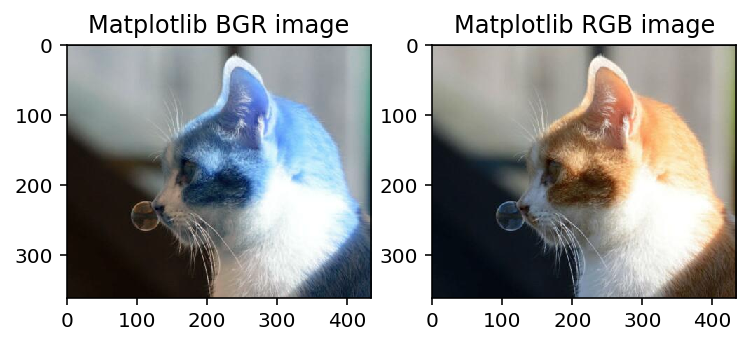

In [29]:
# 使用Matplotlib展示图像
plt.subplot(121)  # 定位第一个网格
plt.title('Matplotlib BGR image')  # 设置子网格标题
plt.imshow(img)  # 设置子网格展示的图像
plt.subplot(122)  # 定位第二个网格
plt.title('Matplotlib RGB image')  # 设置子网格标题
plt.imshow(img2)  # 设置子网格展示的图像

In [30]:
# 使用OpenCV展示图像
cv2.imshow('OpenCV BGR image', img)  # 展示BGR图像
cv2.imshow('OpenCV RGB image', img2)  # 展示RGB图像
cv2.waitKey(0)  # 与显示参数配合使用
cv2.destroyAllWindows()  # 关闭所有窗口

## 2.3.4 读取视频数据

In [31]:
import cv2  # 导入库
cap = cv2.VideoCapture("tree.avi")  # 获得视频对象
status = cap.isOpened()  # 判断文件是否正确打开

In [32]:
# 输出基本属性
if status:  # 如果正确打开，则获得视频的属性信息
    frame_width = cap.get(3)  # 获得帧宽度
    frame_height = cap.get(4)  # 获得帧高度
    frame_count = cap.get(7)  # 获得总帧数
    frame_fps = cap.get(5)  # 获得帧速率
    print('frame width: ', frame_width)  # 打印输出
    print('frame height: ', frame_height)  # 打印输出
    print('frame count: ', frame_count)  # 打印输出
    print('frame fps: ', frame_fps)  # 打印输出

frame width:  320.0
frame height:  240.0
frame count:  444.0
frame fps:  14.999925000374999


In [33]:
# 读取视频内容并展示视频
success, frame = cap.read()  # 读取视频第一帧
while success:  # 如果读取状态为True
    cv2.imshow('vidoe frame', frame)  # 展示帧图像
    success, frame = cap.read()  # 获取下一帧
    k = cv2.waitKey(int(1000 / frame_fps))  # 每次帧播放延迟一定时间，同时等待输入指令
    if k == 27:  # 如果等待期间检测到按键ESC
        break  # 退出循环

In [34]:
# 操作结束释放所有对象
cv2.destroyAllWindows()  # 关闭所有窗口
cap.release()  # 释放视频文件对象

## 2.3.5 读取语音数据

In [35]:
# 导入库
import json  # 用来转换JSON字符串
import base64  # 用来做语音文件的Base64编码
import requests  # 用来发送服务器请求

In [36]:
# 获得token
API_Key = 'DdOyOKo0VZBgdDFQnyhINKYDGkzBkuQr'  # 从申请应用的key信息中获得
Secret_Key = 'oiIboc5uLLUmUMPws3m0LUwb00HQidPx'  # 从申请应用的key信息中获得
token_url = "https://openapi.baidu.com/oauth/2.0/token?grant_type=client_credentials&client_id=%s&client_secret=%s"  # 获得token的地址
res = requests.get(token_url % (API_Key, Secret_Key))  # 发送请求
res_text = res.text  # 获得请求中的文字信息
token = json.loads(res_text)['access_token']  # 提取token信息

In [37]:
# 定义要发送的语音
voice_file = 'baidu_voice_test.pcm'  # 要识别的语音文件
voice_fn = open(voice_file, 'rb')  # 以二进制的方式打开文件
org_voice_data = voice_fn.read()  # 读取文件内容
org_voice_len = len(org_voice_data)  # 获得文件长度
base64_voice_data = base64.b64encode(org_voice_data).decode('utf-8')  # 将语音内容转换为base64编码格式

In [39]:
# 发送信息
# 定义要发送的数据主体信息
headers = {'content-type': 'application/json'}  # 定义header信息
payload = {
    'format': 'pcm',  # 以具体要识别的语音扩展名为准
    'rate': 8000,  # 支持8000或16000两种采样率
    'channel': 1,  # 固定值，单声道
    'token': token,  # 上述获取的token
    'cuid': 'B8-76-3F-41-3E-2B',  # 本机的MAC地址或设备唯一识别标志
    'len': org_voice_len,  # 上述获取的原始文件内容长度
    'speech': base64_voice_data  # 转码后的语音数据
}
data = json.dumps(payload)  # 将数据转换为JSON格式
vop_url = 'http://vop.baidu.com/server_api'  # 语音识别的API
voice_res = requests.post(vop_url, data=data, headers=headers)  # 发送语音识别请求
api_data = voice_res.text  # 获得语音识别文字返回结果
text_data = json.loads(api_data)['result']
print(api_data)  # 打印输出整体返回结果
print(text_data)  # 打印输出语音识别的文字

{"corpus_no":"6631041842572486394","err_msg":"success.","err_no":0,"result":["百度语音提供技术支持，"],"sn":"55093017341543909740"}

['百度语音提供技术支持，']
